In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
from keras import optimizers
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Val'

In [ ]:
vgg= VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [ ]:
IMAGE_SIZE+[3]

[224, 224, 3]

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:

x = vgg.layers[-1].output
x = Flatten()(x)
prediction = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5600 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  callbacks=[earlystopping]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
175/175 [==============================] - 87s 448ms/step - loss: 0.3896 - accuracy: 0.8246 - val_loss: 0.3066 - val_accuracy: 0.8686
Epoch 2/10
175/175 [==============================] - 74s 421ms/step - loss: 0.2797 - accuracy: 0.8864 - val_loss: 0.2287 - val_accuracy: 0.9007
Epoch 3/10
175/175 [==============================] - 73s 419ms/step - loss: 0.2346 - accuracy: 0.9075 - val_loss: 0.1834 - val_accuracy: 0.9321
Epoch 4/10
175/175 [==============================] - 73s 418ms/step - loss: 0.2021 - accuracy: 0.9198 - val_loss: 0.1660 - val_accuracy: 0.9371
Epoch 5/10
175/175 [==============================] - 73s 419ms/step - loss: 0.1818 - accuracy: 0.9312 - val_loss: 0.1558 - val_accuracy: 0.9357
Epoch 6/10
175/175 [==============================] - 73s 418ms/step - loss: 0.1741 - accuracy: 0.9343 - val_loss: 0.1606 - val_accuracy: 0.9421
Epoch 7/10
175/175 [==============================] - 73s 419ms/step - loss: 0.1723 - accuracy: 0.9325 - val_loss: 0.1606 - val_ac

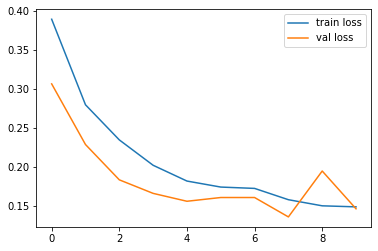

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

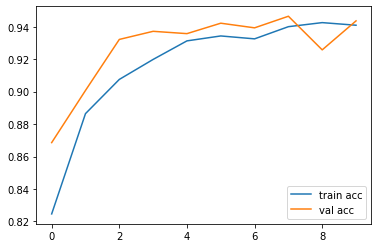

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('model_covid_4.h5')

In [ ]:
model.evaluate_generator(test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.14616313576698303, 0.9435714483261108]

In [ ]:
model.evaluate_generator(training_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.12545016407966614, 0.9528571367263794]

In [ ]:
import tensorflow as tf
classes={0:'Covid',1:'Normal'}
model=tf.keras.models.load_model('model_covid_4.h5')
test_image=tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Dataset/Val/Covid/COVID-1817.png',target_size=(224,224))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(classes[int(result[0][0])])

Covid
